In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import pickle
import geopandas as gpd

In [10]:
import pickle
import os
import h5py

In [63]:
with open('/work/ka1176/shared_data/2021-ai4food/raw_data/ref_fusion_competition_south_africa_train_source_sentinel_1/ref_fusion_competition_south_africa_train_source_sentinel_1_34S_19E_258N_asc_34S_19E_258N_2017/bbox.pkl', 'rb') as f:
    p=pickle.load(f)
    
labels = gpd.read_file('/work/ka1176/shared_data/2021-ai4food/raw_data/ref_fusion_competition_south_africa_train_labels/ref_fusion_competition_south_africa_train_labels_34S_19E_258N/labels.geojson')
npyfolder = '/work/ka1176/shared_data/2021-ai4food/dev_data/south-africa/sentinel-1/extracted/train_1/'

labels_ger = gpd.read_file('/work/ka1176/shared_data/2021-ai4food/raw_data/dlr_fusion_competition_germany_train_labels/dlr_fusion_competition_germany_train_labels_33N_18E_242N/labels.geojson')

In [50]:
print(labels)

# 1 - Wheat
# 2 - Barley
# 3 - Canola
# 4 - Lucerne/Medics
# 5 - Small grain grazing

test_fids = [80609, 80217, 80229, 80172, 81149]

         fid     SHAPE_AREA    SHAPE_LEN  crop_id            crop_name  \
0      80172   86608.783197  2165.333019        4       Lucerne/Medics   
1      80217  129169.262104  1478.177480        2               Barley   
2      80225  231420.387803  2007.104974        4       Lucerne/Medics   
3      80228  100817.991529  1468.847742        4       Lucerne/Medics   
4      80229  375263.554123  2693.791755        3               Canola   
...      ...            ...          ...      ...                  ...   
1710  272638  237553.921793  2062.209147        2               Barley   
1711  272639  142707.098365  2524.575182        1                Wheat   
1712  272759   14774.502277  1020.000876        5  Small grain grazing   
1713  272760   14323.177324   704.568254        4       Lucerne/Medics   
1714  272762  106682.754574  1482.252585        4       Lucerne/Medics   

                                               geometry  
0     MULTIPOLYGON (((456686.552 6215911.790, 456700.

In [74]:
print(labels_ger[labels_ger.crop_id==9])

# 1 - Wheat
# 2 - Rye
# 3 - Barley
# 4 - Oats
# 5 - Corn
# 6 - Oil seeds
# 7 - Root crops
# 8 - Meadows
# 9 - Forage crops

test_fids_ger = [3935, 5336, 11022, 43130, 33096, 35800, 40497, 4724, 54]

         fid    SHAPE_AREA    SHAPE_LEN  crop_id     crop_name  \
0         54    4400.70910   293.870062        9  Forage Crops   
7       5776   19428.77305   632.297992        9  Forage Crops   
10     12758  164570.94790  1926.898897        9  Forage Crops   
24     41150   66738.66415  1147.764598        9  Forage Crops   
28     41180   89630.20290  1526.470461        9  Forage Crops   
...      ...           ...          ...      ...           ...   
2505  209756   41165.59225   966.001946        9  Forage Crops   
2506  209758   94382.63715  1311.829681        9  Forage Crops   
2507  209759   31602.41625   699.162694        9  Forage Crops   
2509  209829    7698.23595   385.999849        9  Forage Crops   
2532  210179   48034.13890  1210.785843        9  Forage Crops   

                                               geometry  
0     MULTIPOLYGON (((449042.600 5827711.200, 449082...  
7     MULTIPOLYGON (((455158.070 5823784.440, 455170...  
10    MULTIPOLYGON (((437952.450 

In [96]:
from itertools import product

for region, source, process in product(['germany', 'south-africa'], ['sentinel-1', 'sentinel-2', 'planet', 'planet-5'], ['default', 'extracted']):
    # process averaged
    if region == 'germany':
        fids_for_check = test_fids_ger
    elif region == 'south-africa':
        fids_for_check = test_fids

    h5_file = f'/work/ka1176/shared_data/2021-ai4food/dev_data/{region}/{source}/{process}/train_data.h5'
    if not os.path.exists(h5_file):
        print('Not processed:', region, source, process)
        continue
        
    file_correct = True
    
    with h5py.File(h5_file, 'r') as f:
        h5_fid = f["fid"][:]
        
        for true_label, fid in enumerate(fids_for_check):
            ix = np.where(h5_fid==fid)[0][0]
        
            h5_crop_name = f["crop_name"][ix]
            h5_label = f["label"][ix]
            
            if true_label + 1 != h5_label:
                print('!!! Assertion failed:', region, source, process)
                file_correct = False
                break
                
        if file_correct:
            print('Correct:', region, source, process)

Correct: germany sentinel-1 default
Correct: germany sentinel-1 extracted
Not processed: germany sentinel-2 default
Correct: germany sentinel-2 extracted
Not processed: germany planet default
Correct: germany planet extracted
Correct: germany planet-5 default
Correct: germany planet-5 extracted
Correct: south-africa sentinel-1 default
Correct: south-africa sentinel-1 extracted
Correct: south-africa sentinel-2 default
Correct: south-africa sentinel-2 extracted
Not processed: south-africa planet default
Correct: south-africa planet extracted
Correct: south-africa planet-5 default
Correct: south-africa planet-5 extracted


In [ ]:
## debug sentinel 1 selectionS

In [112]:
image_stack = np.load('/work/ka1176/caroline/jobs/ai4food/prepare_random_extract_data/south-africa/debug_image_stack.npy')

In [113]:
mask = np.load('/work/ka1176/caroline/jobs/ai4food/prepare_random_extract_data/south-africa/debug_mask.npy')

In [114]:
mask

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [115]:
image_stack.shape

(41, 2, 140)

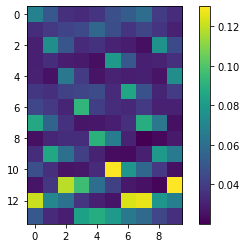

In [117]:
plt.imshow(np.max(image_stack[:,1], axis=0).reshape(14, 10))
plt.colorbar()

In [144]:
bbox = p

In [145]:
minx, miny, maxx, maxy = bbox.min_x, bbox.min_y, bbox.max_x, bbox.max_y

In [146]:
maxx - minx, maxy - miny

(24000.61714843783, 24000.88960574288)

In [147]:
import rasterio as rio
from rasterio import features

In [148]:
transform = rio.transform.from_bounds(minx, miny, maxx, maxy, width, height)
print(width, height)

2400 2400


In [149]:
fid_mask = features.rasterize(zip(labels.geometry, labels.fid), all_touched=True, transform=transform, out_shape=(width, height))
crop_mask = features.rasterize(zip(labels.geometry, labels.crop_id), all_touched=True, transform=transform, out_shape=(width, height))

2437

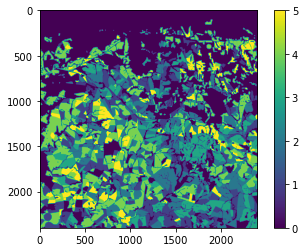

In [150]:
plt.imshow(crop_mask)
plt.colorbar()
len(np.unique(fid_mask))

In [151]:
npyfolder = '/work/ka1176/shared_data/2021-ai4food/dev_data/south-africa/sentinel-1/extracted/train_2/'
labels = gpd.read_file('/work/ka1176/shared_data/2021-ai4food/raw_data/ref_fusion_competition_south_africa_train_labels/ref_fusion_competition_south_africa_train_labels_34S_19E_259N/labels.geojson')

import os

In [152]:
for index, feature in labels.iterrows():
    
    if feature.SHAPE_AREA < 1000:
        print(index)
        continue
    
    
    left, bottom, right, top = feature.geometry.bounds
    window = rio.windows.from_bounds(left, bottom, right, top, transform)
    
    row_start = max(0, round(window.row_off))
    row_end = round(window.row_off) + round(window.height)
    col_start = max(0, round(window.col_off))
    col_end = round(window.col_off) + round(window.width)
    
    image_stack = bands[:, :,row_start:row_end, col_start:col_end]
    mask = fid_mask[row_start:row_end, col_start:col_end]
    cmask = crop_mask[row_start:row_end, col_start:col_end]
    #print(mask, window.width, window.height)
    #print(row_start, row_end, col_start, col_end)
    
    ll = feature.crop_id
    
    #print(ll)
    
    bb = (mask == feature.fid)
    
    
    
    processed = os.path.join(npyfolder, f'fid_{feature.fid}.npz')
    obj = np.load(processed)
    
    processed_image_stack = obj["image_stack"]
    
    
    assert (image_stack.shape == processed_image_stack.shape), print(feature.fid, image_stack.shape, processed_image_stack.shape)
    
    
    if np.sum(bb) == 0:
        print(bb.shape, row_start, col_start, feature)
        plt.imshow(bb)
    

800
1704
1730
1753
1828


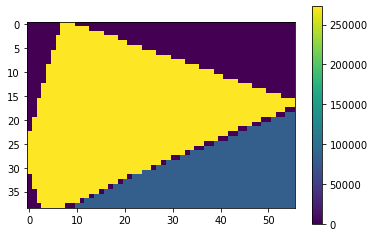

In [131]:
plt.imshow(mask)
plt.colorbar()

In [121]:
for ff in np.sort(os.listdir(npyfolder)):
    obj = np.load(os.path.join(npyfolder, ff))
    print(obj["image_stack"].shape)

(41, 2, 95, 76)
(41, 2, 43, 46)
(41, 2, 90, 64)
(41, 2, 66, 31)
(41, 2, 61, 47)
(41, 2, 51, 113)
(41, 2, 57, 79)
(41, 2, 78, 86)
(41, 2, 70, 77)
(41, 2, 62, 72)
(41, 2, 76, 138)
(41, 2, 49, 32)
(41, 2, 25, 53)
(41, 2, 13, 8)
(41, 2, 78, 37)
(41, 2, 61, 62)
(41, 2, 78, 54)
(41, 2, 46, 70)
(41, 2, 64, 65)
(41, 2, 59, 46)
(41, 2, 50, 93)
(41, 2, 71, 74)
(41, 2, 65, 120)
(41, 2, 44, 78)
(41, 2, 61, 77)
(41, 2, 34, 61)
(41, 2, 62, 88)
(41, 2, 32, 27)
(41, 2, 112, 49)
(41, 2, 86, 38)
(41, 2, 75, 71)
(41, 2, 76, 88)
(41, 2, 73, 55)
(41, 2, 37, 61)
(41, 2, 24, 61)
(41, 2, 75, 42)
(41, 2, 51, 61)
(41, 2, 72, 110)
(41, 2, 53, 38)
(41, 2, 69, 86)
(41, 2, 39, 128)
(41, 2, 62, 66)
(41, 2, 57, 54)
(41, 2, 69, 39)
(41, 2, 26, 82)
(41, 2, 51, 76)
(41, 2, 54, 67)
(41, 2, 18, 27)
(41, 2, 20, 31)
(41, 2, 15, 31)
(41, 2, 16, 28)
(41, 2, 38, 33)
(41, 2, 27, 30)
(41, 2, 13, 26)
(41, 2, 86, 90)
(41, 2, 40, 67)
(41, 2, 62, 143)
(41, 2, 85, 73)
(41, 2, 62, 87)
(41, 2, 76, 85)
(41, 2, 75, 109)
(41, 2, 49, 60)
(

In [158]:
obj = np.load('/work/ka1176/shared_data/2021-ai4food/dev_data/south-africa/sentinel-2/extracted/train_1/fid_185166.npz')

In [185]:
img = obj["image_stack"]
cld = obj["cloud_stack"]
mask = obj["mask"]

In [186]:
cld.shape, img.shape, mask

((76, 1, 78, 86),
 (76, 12, 78, 86),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.]], dtype=float32))

In [161]:
ix = 0

0 203.0
10 11.0
20 251.0
30 41.0
40 2.0
50 255.0
60 2.0
70 1.0


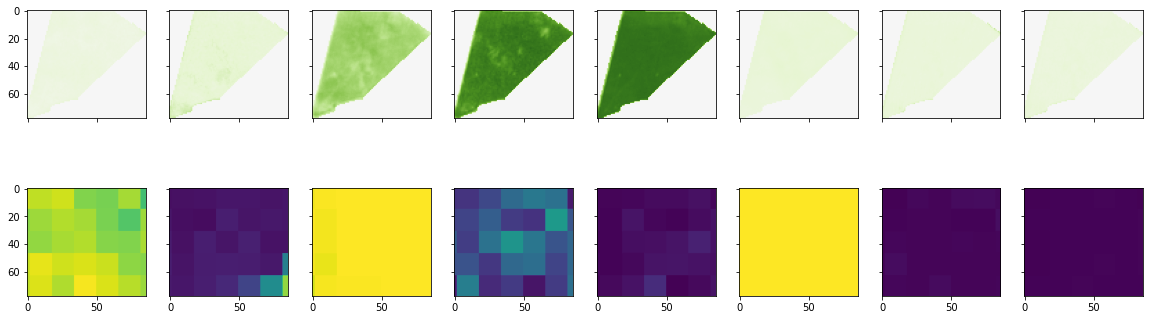

In [190]:
fig, axs = plt.subplots(2, 8, sharex=True, sharey=True, figsize=(20, 6))

for i, ix in enumerate([0, 10, 20, 30, 40, 50, 60, 70]):

    cld_ix = cld[ix].squeeze()
    ndvi_ix = (img[ix, 7] - img[ix, 3]) / (img[ix, 7] + img[ix, 3]) * mask
    rgb_ix = img[ix, [3, 1, 2]].transpose(1, 2, 0) * 1e-4
    
    axs[0, i].imshow(ndvi_ix, cmap='PiYG', vmin=-1, vmax=+1)
    axs[1, i].imshow(cld_ix, vmin=0, vmax=255)
    
    print(ix, np.median(cld_ix * mask))

In [192]:
all_ndvi = []
all_clp = []

for ix in range(76):
    ndvi_ix = (img[ix, 7] - img[ix, 3]) / (img[ix, 7] + img[ix, 3]) * mask
    all_ndvi.append(np.mean(ndvi_ix))
    all_clp.append(np.mean(cld[ix].squeeze()*mask))

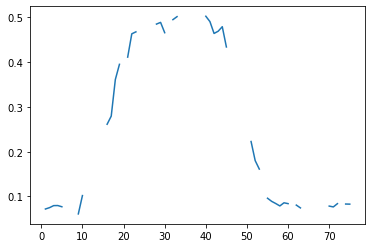

In [196]:
clp_ndvi = np.copy(all_ndvi)
clp_ndvi[np.array(all_clp)>50] = None

plt.plot(np.arange(76), clp_ndvi)